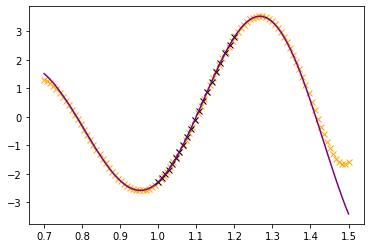

In [1]:

def PiecewisePoly(Ndeg, x0, y0, x_j):
    
    #y_j = f(x_j)                     # finding f(x) for the eval pts
    MM = Ndeg + 1                      # degree + 1 = number of points to find
    N_interpolant = len(x0) - Ndeg      # number of polynomials to get 
    pts = np.arange(Ndeg+1) + np.arange(N_interpolant).reshape(N_interpolant,1)  # small set of x points
    
    a = np.zeros((Ndeg+1,N_interpolant))
    pows = (MM-1-np.arange(MM)).reshape(MM,1)         
    
    # coefs for every interpolant
    for i in range(N_interpolant):
        A = np.vander(x0[pts[i,:]])
        a[:,i] = np.linalg.solve(A,y0[pts[i,:]])     #vander + solving for small set of x points
    
     
    y = np.zeros([len(x_j), 1])
    
   
    pows = Ndeg-np.arange(MM)    #putting powers in correct order
    
    
    for n in range(len(x_j)):
        if((x_j[n]<x0).all()):
            k=0
        elif((x_j[n]>x0).all()):
            k=len(x0)-1
        else:                # find k for x_i, accounting for the possibility that x_i=x_k
            k = np.where(((x_j[n]<x0[1:]) & (x_j[n]>=x0[:-1])) | 
                         ((x0[1:]==x_j[n]) & (x_j[n]>x0[:-1])))[0][0]
     
        j = k - Ndeg//2    
        
        j = max(0,j)
        j = min(j,N_interpolant-1)
        
        y[n] = np.sum(a[:,j]*x_j[n]**pows)  # obtain new data point
      
    return y


# In[2]:


#testing function using given function and plotting graph over chosen appropriate points

import numpy as np

def f(x):
    return np.exp(x)*np.cos(10*x)

N = 20


r0 = np.linspace(0,1/6,N)

x1 = 1/(1- r0) # coordinate transformation to test uneven spacing

y1 = f(x1)

x2 = np.linspace(0.7, 1.5, 100)

Y = PiecewisePoly(10, x1, y1, x2)

import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

plt.plot(x2, Y, "x", color = "orange")
plt.plot(x1, y1, "x", color = "black")
plt.plot(x2, f(x2), color = "purple")